Building the Upstream using raw ACE and Wind Data and Comparing it to OMNI and Artemis and seeing if we are better than NASA.

Packages

In [1]:
import pandas as pd
import pyspedas
#from pyqtgraph.graphicsItems.PlotDataItem import dataType
from pyspedas import tplot
import matplotlib.pyplot as plt
from pytplot import get_data
#import pandas as pd
import numpy as np


14-Oct-25 08:45:04: C:\Users\Brian\anaconda3\envs\Research_Espen\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(



Importing Data (ACE, Wind, OMNI)

In [2]:
pyspedas.projects.omni.data(trange=["2024-09-27/00:00:00", "2024-09-28/23:59:59"], datatype='1min', level='hro2', time_clip=True)

14-Oct-25 08:45:05: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro2_1min/2024/
14-Oct-25 08:45:07: File is current: omni_data/hro2_1min/2024/omni_hro2_1min_20240901_v01.cdf


['IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'NaNp_Ratio',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H']

In [3]:
pyspedas.projects.ace.mfi(trange=["2024-09-26/22:30:00", "2024-09-28/23:59:59"], datatype='h3', time_clip=True)

14-Oct-25 08:45:09: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/ace/mag/level_2_cdaweb/mfi_h3/2024/
14-Oct-25 08:45:10: File is current: ace_data/mag/level_2_cdaweb/mfi_h3/2024/ac_h3_mfi_20240926_v03.cdf
14-Oct-25 08:45:12: File is current: ace_data/mag/level_2_cdaweb/mfi_h3/2024/ac_h3_mfi_20240927_v03.cdf
14-Oct-25 08:45:14: File is current: ace_data/mag/level_2_cdaweb/mfi_h3/2024/ac_h3_mfi_20240928_v03.cdf


['Magnitude', 'BRTN', 'BGSEc', 'BGSM']

In [4]:
pyspedas.projects.wind.mfi(trange=["2024-09-26/22:30:00", "2024-09-28/23:59:59"], datatype='h0', time_clip=True)

14-Oct-25 08:45:21: File is current: wind_data/wind_masters/wi_h0_mfi_00000000_v01.cdf
14-Oct-25 08:45:21: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2024/
14-Oct-25 08:45:23: File is current: wind_data/mfi/mfi_h0/2024/wi_h0_mfi_20240926_v05.cdf
14-Oct-25 08:45:25: File is current: wind_data/mfi/mfi_h0/2024/wi_h0_mfi_20240927_v05.cdf
14-Oct-25 08:45:27: File is current: wind_data/mfi/mfi_h0/2024/wi_h0_mfi_20240928_v05.cdf


['BF1',
 'BRMSF1',
 'BGSM',
 'BRMSGSM',
 'BGSE',
 'BRMSGSE',
 'DIST',
 'PGSM',
 'PGSE',
 'B3F1',
 'B3RMSF1',
 'B3GSM',
 'B3RMSGSM',
 'B3GSE',
 'B3RMSGSE',
 'B1F1',
 'B1RMSF1',
 'B1GSM',
 'B1RMSGSM',
 'B1GSE',
 'B1RMSGSE',
 'DIST1',
 'P1GSM',
 'P1GSE']

Getting Data

In [5]:
ace_bz = get_data("BGSM",dt = True)
wind_bz = get_data("B3GSM",dt = True)
omni_bz = get_data("BZ_GSM",dt = True)
SC_ID = get_data('IMF',dt = True)
TimeShift = get_data("Timeshift",dt = True)

Interpolating Omni data to 1 minute, and Ace and Wind data to 1 second

In [6]:


omni = pd.DataFrame({'Time': get_data('BZ_GSM')[0], 'BZ_GSM': get_data('BZ_GSM')[1],'IMF': get_data('IMF')[1], "ts": get_data('Timeshift')[1]})
omni['Time'] = pd.to_datetime(omni['Time'], unit='s')
omni = omni.set_index('Time')
omni = omni.resample('min').mean().interpolate(method='linear').ffill().bfill()
omni = omni.reset_index()


ace = pd.DataFrame({'Time': get_data('BGSM')[0], 'BX_GSM': get_data('BGSM')[1][:,2]})
ace['Time'] = pd.to_datetime(ace['Time'], unit='s')
ace = ace.set_index('Time')
ace = ace.resample('s').mean().interpolate(method='linear').ffill().bfill()
ace = ace.reset_index()
#, columns = ['Time', 'BX_GSM', 'BY_GSM', 'BZ_GSM', 'VX', 'VY', 'VZ', 'N', 'T', 'Xpos']).replace(to_replace=[999.990, 9999.99, 99999.9, 9999999], value=np.nan

wind = pd.DataFrame({'Time': get_data('B3GSM')[0], 'BX_GSM': get_data('B3GSM')[1][:,2]})
wind['Time'] = pd.to_datetime(wind['Time'], unit='s')
wind = wind.set_index('Time')
wind = wind.resample('s').mean().ffill().interpolate(method='linear').bfill()
wind = wind.reset_index()
#, columns = ['Time', 'BX_GSM', 'BY_GSM', 'BZ_GSM', 'VX', 'VY', 'VZ', 'N', 'T', 'Xpos']).replace(to_replace=[999.990, 9999.99, 99999.9, 9999999], value=np.nan


Learning how to use Timedelta and being able to shift by the timeshift.

In [9]:
omni['ts']
delta4 = pd.Timedelta(omni['ts'][0], unit='s') # 5 days
#print(delta4)
omni['Time']-delta4
#print(ace['Time'])
#print(ace['Time'].loc(ace['Time']))
a = ace['Time'][50000]-delta4
print(a)
#ace['Time'].index(a)
#print(type(ace['Time']))

#Im still trying to figure out how to index a certain time frame to map to the ACE and Wind data

2024-09-27 11:34:49


In [8]:
upstream = []
upstream_time = []

for i in range(len(omni['IMF'])):
    delta = pd.Timedelta(omni['ts'][i], unit='s')
    time = omni['Time'][i] - delta
    index =
    if omni["IMF"][i] == 51 or 52:
        upstream.append(ace['Time'][index])
        upstream_time.append(time)
    elif omni["IMF"][i] == 71:
        upstream.append(wind['Time'][index])
        upstream_time.append(time)
    else:
        upstream.append(0)
        upstream_time.append(time)



SyntaxError: invalid syntax (1551273816.py, line 7)

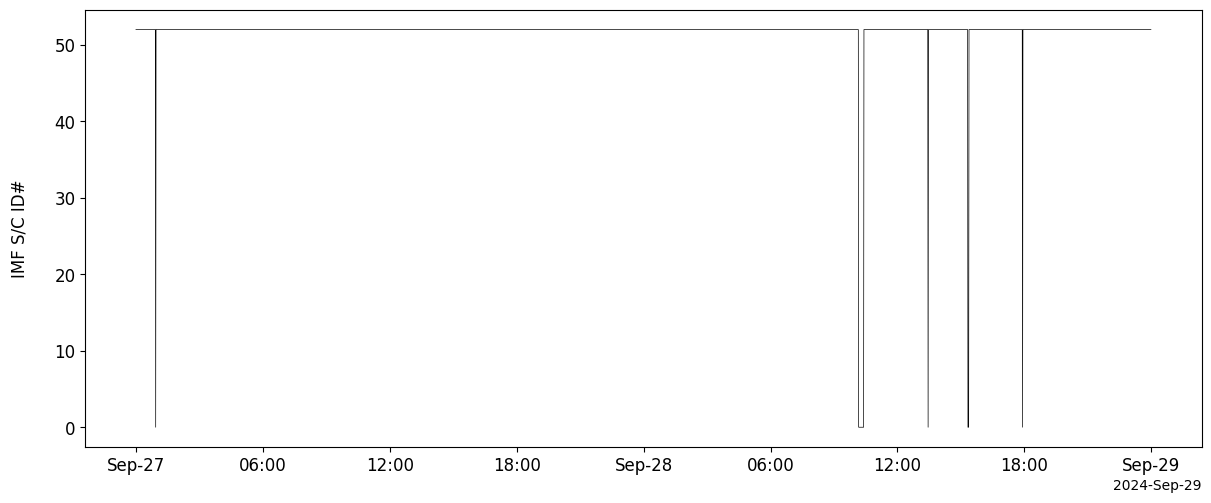

In [141]:
tplot(['IMF'])

NameError: name 'upstream_other_time' is not defined

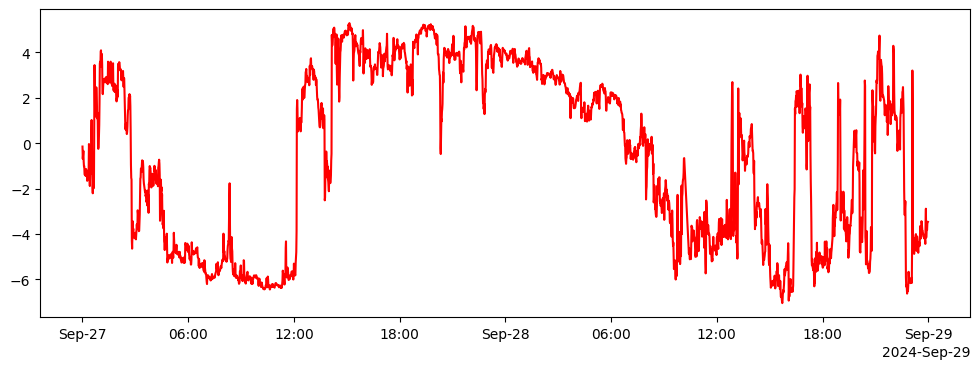

In [142]:
fig, ax = plt.subplots(figsize = (12,4))
plt.plot(upstream_time, upstream, label='Wind', color='blue', linestyle='-')
plt.plot(omni['Time'], omni['BZ_GSM'], label='Ace', color='red', linestyle='-')
plt.plot(upstream_other_time, upstream_other, label='Other', color='green', linestyle='-')
plt.xlabel('Date')
plt.ylabel('GSM Bz (nT)')
plt.title('GSM Bz of Omni Data')
plt.legend()
plt.show()